# Regressão Linear

Em Machine Learning, esse algoritmo faz parte dos algoritmos de aprendizado **SUPERVISIONADO**, também chamados de **preditivos**, que são aqueles para os quais são providos **exemplos COM RESPOSTA** para que o algoritmo crie um modelo que faça uma **predição** de valor ou classe (rótulo). Aos que fazem predição de valor, é dado o nome de **regressão** e aos que fazem predição de classe, é dado o nome de **classificação**.

<table>
    <tr> 
        <td>
            <img src="../../04-RegressaoLogistica/images/regxclass-tempo.png" width="500"/>
        </td>
        <td>
            <img src="../../04-RegressaoLogistica/images/regxclass1.jpg" width="400"/>
            <img src="../../04-RegressaoLogistica/images/regxclass2.jpg" width="400"/>
        </td>
    </tr>
</table>

A regressão linear tem origem na estatística. É uma equação para se estimar o valor esperado de uma variável Y com base nos valores de outras variáveis x. 

![reglinear](../images/reg.png)

## Os dados

Voltando ao dataset do Fifa 19...

Os dados podem ser [encontrados no Kaggle](https://www.kaggle.com/karangadiya/fifa19). 

![fifa](../images/fifa.jpeg)

## Tarefa de hoje:

Nesta aula, usaremos a biblioteca ScikitLearn e o modelo de regressão linear para tentar **prever** os valores da coluna **"Overall"**.

## Antes de iniciarmos o processo de criação do modelo: EDA

Como conversado anteriormente, antes de aplicar os conceitos de IA, precisamos entender o contexto dos dados a serem trabalhados, o que chamamos de Análise Exploratória (Exploratory Data Analysis - EDA).

Abaixo, são apresentados alguns dos passos de EDA desenvolvidos rapidamente para que nosso modelo pudesse, então, ser criado. Lembre que esse não é o foco desta aula ....

In [20]:
#Lendo os dados
import pandas as pd
pd.set_option('display.max_columns',200)
data = pd.read_csv('../data/data.csv', index_col = 0)

#Arrumando algumas variáveis numéricas:
def convert_currency(col):
    return (col.str.lstrip('€')
               .str.rstrip('.')
               .str.replace('K','000')
               .str.replace('M','000000')
               .astype('float'))

data['Value'] = convert_currency(data.Value)
data['Wage'] = convert_currency(data.Wage)
data['Weight'] = data.Weight.str.rstrip('lbs').astype('float')

#Filtrando variáveis numéricas
#PS: escolha decorrente de um processo CONSCIENTE de Análise Exploratória!!!
data_numeric = data[['Age', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weight',
               'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'GKPositioning',
                'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure',
                'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                'GKKicking','GKReflexes', 'Overall']]

#Excluindo desse meu conjunto de variáveis selecionadas as linhas que tem algum valor nulo
#PS: aqui decidi excluir porque sei que não são muitos os casos, então não vou perder muito dado
data_numeric = data_numeric.dropna()

In [21]:
data_numeric.head(5)

,Age,Potential,Value,Wage,Special,International Reputation,Weight,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,GKPositioning,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKReflexes,Overall
0,31,94,110.5,565000.0,2202,5.0,159.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,14.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,8.0,94
1,33,94,77000000.0,405000.0,2228,5.0,183.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,14.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,11.0,94
2,26,93,118.5,290000.0,2143,5.0,150.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,15.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,11.0,92
3,27,93,72000000.0,260000.0,1471,4.0,168.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,88.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,94.0,91
4,27,92,102000000.0,355000.0,2281,4.0,154.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,10.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,13.0,91


## Passo 1: estimar com base na coluna 'Value'

Se usássemos somente ao valor de mercado do jogador para estimar o overall, como seria?

### Vamos dar uma olhada rápida da distribuição dessa variável...

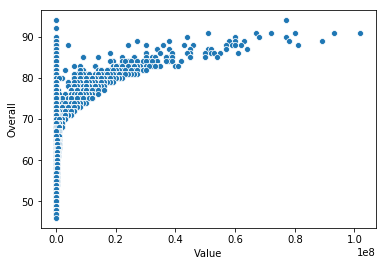

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = data, x = 'Value', y = 'Overall')

### Precisamos dividir algumas coisas:

1. Precisamos dividir o que é característica (x) do que é o valor a ser predito (y)
2. Também precisamos dividir o que vai ser usado para treinar o modelo e o que vai ser usado para verificar a performance do modelo.

In [23]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = data_numeric.Value.values
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

![train_test_split](../images/train_test.png)

### Agora sim podemos treinar o modelo:

In [24]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo
model = LinearRegression().fit(x_train.reshape(-1,1), y_train)

In [25]:
# Fazendo as previsões
y_pred = model.predict(x_test.reshape(-1,1))

/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


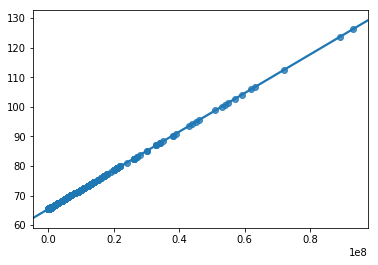

In [26]:
# Vamos ver a reta das previsões feitas:
sns.regplot(x = x_test, y = y_pred)

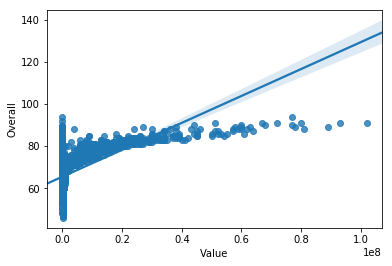

In [27]:
sns.regplot(data = data, x = 'Value', y = 'Overall')

### Avaliando o modelo
Várias são as métricas que podemos usar para avaliar um modelo de regressão. Aqui vamos conversar sobre as 3 mais comuns:

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza *mais* erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa. 

In [29]:
mean_squared_error(y_test, y_pred)

40.23938900435588

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

In [30]:
mean_absolute_error(y_test, y_pred)

4.994253480928422

In [35]:
data.Overall.mean()

66.23869940132916

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

In [31]:
r2_score(y_test, y_pred)

0.14933268822378598

## Passo 2: estimar com base na coluna 'Age'


In [36]:
# Dividindo x e y
x = data_numeric.Age.values
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Treinando o modelo
model = LinearRegression().fit(x_train.reshape(-1,1), y_train)

# Fazendo as previsões
y_pred = model.predict(x_test.reshape(-1,1))

# Avaliando o modelo
r2_score(y_test, y_pred)

0.2107730403110114

## Passo 3: faça o mesmo para a coluna 'Weight'

In [37]:
# Dividindo x e y
x = data_numeric.Weight.values
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Treinando o modelo
model = LinearRegression().fit(x_train.reshape(-1,1), y_train)

# Fazendo as previsões
y_pred = model.predict(x_test.reshape(-1,1))

# Avaliando o modelo
r2_score(y_test, y_pred)

0.028676769820781045

## Passo 4: Agora com todas as variáveis numéricas 
Até agora fizemos uma regressão linear simples, usando somente uma variável de característica para prever o target (Y). Agora vamos usar todas as variáveis numéricas selecionadas lá no início para fazer uma **regressão linear múltipla**!

In [38]:
# Dividindo x e y
x = data_numeric.drop(columns="Overall").values 
# PS: NUNCA ESQUEÇA DE TIRAR A RESPOSTA DO CONJUNTO DE CARACTERÍSTICAS!!!
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = LinearRegression().fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

# Calculando o erro - medida de qualidade do modelo
r2_score(y_test, y_pred)

0.9290835748407232

## Interpretação dos coeficientes da regressão:
Vamos dar uma olhada nos coeficientes encontrados para cada característica:

In [16]:
(pd.DataFrame({'feature': data_numeric.columns[:-1],
               'coef': model.coef_.round(4)})
  .sort_values(by='coef', ascending = False)
  .reset_index(drop = True))

,feature,coef
0,Age,0.5035
1,Potential,0.5007
2,Reactions,0.1308
3,BallControl,0.0576
4,Composure,0.0458
5,GKReflexes,0.0367
6,HeadingAccuracy,0.0313
7,ShortPassing,0.0309
8,GKDiving,0.0275
9,GKHandling,0.0191


### Coeficientes e a padronização:
Não fizemos uma coisa MUITO importante para usar essas variáveis numéricas: PADRONIZAÇÃO!!!
Vamos retreinar o modelo e ver como os coeficientes resultantes são diferentes:

In [41]:
from sklearn.preprocessing import StandardScaler

x = data_numeric.drop(columns=['Overall'])
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Agora, vamos usar os dados de treinamento para treinar o padronizador e depois aplicar 
# esse padronizador tanto no conjunto de características de treino quanto no conjunto de teste.
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Treinando o modelo
model = LinearRegression(normalize = True).fit(x_train_scaled, y_train)

# Fazendo as previsões
y_pred = model.predict(x_test_scaled)

# Avaliando o modelo
r2_score(y_test, y_pred)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


0.9290835748395821

O erro é muuuito semelhante, mas vamos olhar a diferença nos coeficientes:

In [42]:
(pd.DataFrame({'feature': data_numeric.columns[:-1],
               'coef': model.coef_.round(4)})
  .sort_values(by='coef', ascending = False)
  .reset_index(drop = True))

,feature,coef
0,Special,4.0575
1,Potential,3.0841
2,Age,2.3540
3,Reactions,1.1789
4,BallControl,0.9588
5,GKReflexes,0.6528
6,HeadingAccuracy,0.5433
7,Composure,0.5256
8,GKDiving,0.4830
9,ShortPassing,0.4540


### Mais um detalhe: multicolinearidade

Basicamente, o problema da multicolinearidade é: se você colocar no conjunto de características duas características que carregam a mesma informação ou que tem relação linear muito forte, seu modelo pode acabar ignorando (colocando um coeficiente baixo) uma das características e isso não significa que ela não é importante para a previsão, só significa que a informação dela, naquele conjunto de características, não foi tão relevante.

Portanto, o ideal é retirar das características aquelas com correlação muito forte.

Nesse site, ele explica com uns exemplos de futebol essa ideia: https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao

Um artigo científico do IME-USP sobre isso, pra quem gosta de entender mais a fundo matematicamente: https://www.ime.usp.br/~yambar/MI404-Metodos%20Estatisticos/Aula%208-9%20Regress%E3o%20mult%20dim/inete%20adicional%20-%20multicolinearidade%20em%20modelos%20de%20regressao.pdf

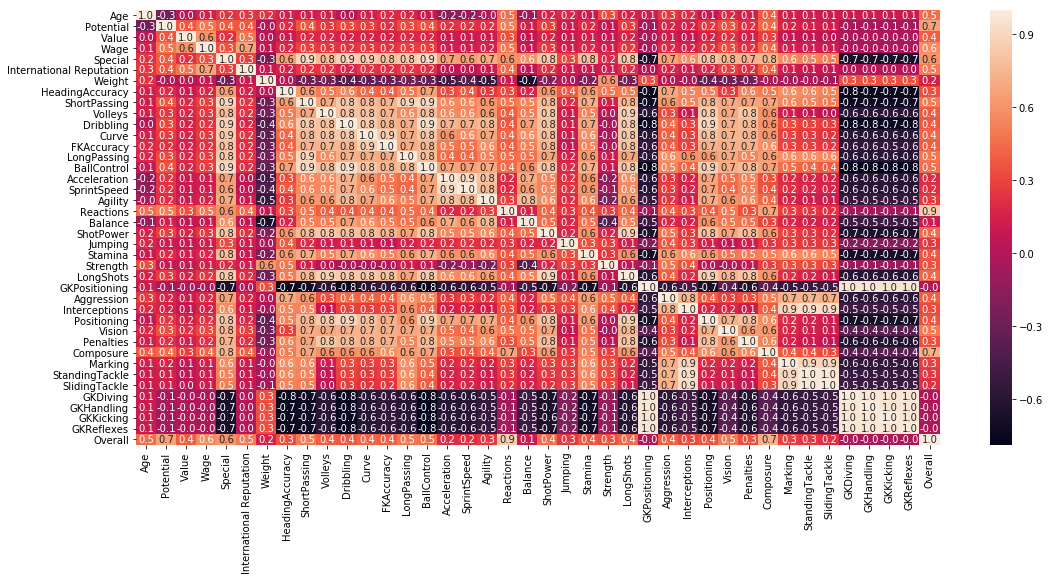

In [19]:
plt.figure(figsize=(18,8))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".1f");

## Próximos passos:

- Tente melhorar esse modelo explorando também as características categóricas do conjunto de dados.
- Faça outros exercícios de regressão. Nesse material, no diretório notebooks_extras, serão disponibilizados alguns exemplos e você também sempre pode recorrer aos vários desafios disponíveis no Kaggle.